In [1]:
import numpy as np
from helpers.data_loading import *

In [2]:
embeddings = np.load("data/embeddings/CNN_faces_1k.npy")

In [3]:
y, _ = load_labels()

In [4]:
y.shape

(10000,)

In [5]:
meta, _ = load_meta_features(only_num=True)
meta_to_predict, _ = load_meta_features('data/facial_features_test.csv', only_num=True)
to_keep = list(set(meta.columns).intersection(set(meta_to_predict.columns)))
to_keep.sort()  # sort in alphabetical order to always have the same order
meta_train = meta[to_keep][0:9500]
meta_test = meta[to_keep][9500:10000]

In [6]:
embeddings_train = embeddings[0:9500, :]
embeddings_test = embeddings[9500:10000, :]
embeddings_to_predict = embeddings[10000:13000, :]
y_train = y[0:9500]
y_test = y[9500:10000]

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
clf = RandomForestRegressor(n_estimators=10)
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=200)

In [20]:
X_train = np.hstack((embeddings_train, meta_train))
X_test = np.hstack((embeddings_test, meta_test))
X_to_predict = np.hstack((embeddings_to_predict, meta_to_predict))

In [10]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [11]:
preds = clf.predict(X_test)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

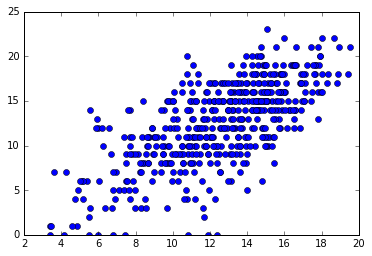

In [13]:
plt.plot(preds, y_test, 'o')

In [14]:
from spearman import score_function

In [19]:
score_function(y_test, np.round(preds))

0.68024250763566674

In [16]:
meta.shape

(10000, 105)

In [17]:
meta_test.shape

(500, 93)

In [18]:
# prediction

array([ 15.88975375,  14.54508649,   8.94793992, ...,  16.46917766,
         5.99417952,   8.73870499])

In [22]:
export_submission(clf.predict(X_to_predict), "boosting_on_embeddings")

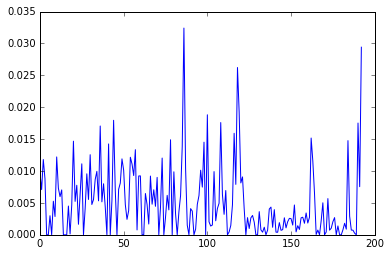

In [24]:
plt.plot(clf.feature_importances_)

In [27]:
meta_train.columns[::-1]

Index([u'y0', u'x0', u'width', u'upper_lip_y', u'upper_lip_x', u'surprise',
       u'smile', u'sadness', u'roll angle', u'right_of_right_eyebrow_y',
       u'right_of_right_eyebrow_x', u'right_of_left_eyebrow_y',
       u'right_of_left_eyebrow_x', u'right_eyebrow_upper_midpoint_y',
       u'right_eyebrow_upper_midpoint_x', u'right_eye_y', u'right_eye_x',
       u'right_eye_top_boundary_y', u'right_eye_top_boundary_x',
       u'right_eye_right_corner_y', u'right_eye_right_corner_x',
       u'right_eye_pupil_y', u'right_eye_pupil_x', u'right_eye_left_corner_y',
       u'right_eye_left_corner_x', u'right_eye_bottom_boundary_y',
       u'right_eye_bottom_boundary_x', u'right_eye', u'right_ear_tragion_y',
       u'right_ear_tragion_x', u'pan angle', u'other', u'nose_tip_y',
       u'nose_tip_x', u'nose_bottom_right_y', u'nose_bottom_right_x',
       u'nose_bottom_left_y', u'nose_bottom_left_x', u'nose_bottom_center_y',
       u'nose_bottom_center_x', u'neutral', u'mouth_right_y', u'mouth_ri

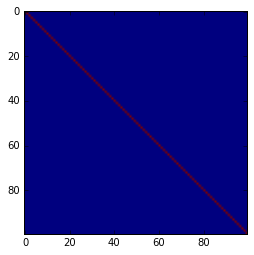

In [45]:
img = np.eye(100)
plt.imshow(img)

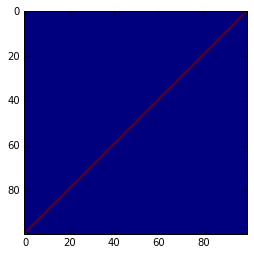

In [48]:
plt.imshow(img[:, ::-1])

In [50]:
angle = 40  # degree
rotated = np.zeros((60, 60))

In [51]:
meta.columns

Index([u'age', u'anger', u'angle_impact_n', u'angle_impact_p',
       u'background_impact_n', u'background_impact_p', u'chin_gnathion_x',
       u'chin_gnathion_y', u'chin_left_gonion_x', u'chin_left_gonion_y',
       ...
       u'sadness', u'sharpness_impact_n', u'sharpness_impact_p', u'smile',
       u'surprise', u'upper_lip_x', u'upper_lip_y', u'width', u'x0', u'y0'],
      dtype='object', length=105)

In [52]:
meta['sadness']

ID
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.000000
15       0.000000
16       0.000000
17       0.000000
18       0.000000
19       0.000000
20       0.333333
21       0.000000
22       0.000000
23       0.000000
24       0.000000
25       0.000000
26       0.000000
27       0.000000
28       0.000000
29       0.333333
30       0.000000
           ...   
9971     0.000000
9972     0.000000
9973     0.000000
9974     0.166667
9975     0.000000
9976     0.000000
9977     0.000000
9978     0.000000
9979     0.500000
9980     0.166667
9981     0.000000
9982     0.000000
9983     0.166667
9984     0.166667
9985     0.000000
9986     0.000000
9987     0.000000
9988     0.000000
9989     0.000000
9990     0.571429
9991     0.000000
9992     0.000000
9993     0.000000
9994     0.000000
9995   